In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants, interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, savgol_filter


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
eps = 11.7

In [3]:
data_sula1 = pd.read_csv('GaN_ch_sula.txt', sep='\t', names=['T','channel_1', 'channel_2', 'channel_3', 'channel_4'])

In [4]:
data_sula_h = pd.read_csv('GaN_ch_heating.txt', sep='\t', names=['T','channel_1', 'channel_2', 'channel_3', 'channel_4'])
data_sula_c = pd.read_csv('GaN_ch_cooling.txt', sep='\t', names=['T','channel_1', 'channel_2', 'channel_3', 'channel_4'])

In [5]:
data_agilent_1k=pd.read_csv('GaN_1K.csv')
data_agilent_10k=pd.read_csv('GaN_10K.csv')
data_agilent_100k=pd.read_csv('GaN_100K.csv')
data_agilent_1m=pd.read_csv('GaN_1M.csv')

In [6]:
data_agilent_1k = data_agilent_1k.rename({'Data Trace Real_A': 'Capacity'}, axis=1)
data_agilent_10k = data_agilent_10k.rename({'Data Trace Real_A': 'Capacity'}, axis=1)
data_agilent_100k = data_agilent_100k.rename({'Data Trace Real_A': 'Capacity'}, axis=1)
data_agilent_1m = data_agilent_1m.rename({'Data Trace Real_A': 'Capacity'}, axis=1)

In [7]:
data_agilent_1k.head(3)


,Bias,Capacity,Data Trace Real_B
0,-10.000,4.068984e-11,6.982039e-08
1,-9.962,5.184418e-11,-5.602752e-08
2,-9.925,5.979622e-12,3.087470e-07


In [8]:
data_agilent_10k.head(3)


,Bias,Capacity,Data Trace Real_B
0,-10.000,4.228496e-11,3.846341e-07
1,-9.962,4.832123e-11,2.087777e-07
2,-9.925,4.684128e-11,3.627882e-08


In [9]:
data_agilent_100k.head(3)


,Bias,Capacity,Data Trace Real_B
0,-10.000,4.471737e-11,8.926544e-07
1,-9.962,4.470095e-11,1.195246e-06
2,-9.925,4.511688e-11,1.363461e-06


In [10]:
data_agilent_1m.head(3)

,Bias,Capacity,Data Trace Real_B
0,-10.000,4.128402e-11,0.000070
1,-9.962,4.168004e-11,0.000071
2,-9.925,4.191826e-11,0.000073


In [11]:
data_agilent_1k['capacity_wt_power'] = data_agilent_1k['Capacity']*1e12
data_agilent_10k['capacity_wt_power'] = data_agilent_10k['Capacity']*1e12
data_agilent_100k['capacity_wt_power'] = data_agilent_100k['Capacity']*1e10
data_agilent_1m['capacity_wt_power'] = data_agilent_1m['Capacity']*1e10


In [12]:
data_agilent_1k['1_over_C2'] = data_agilent_1k['Capacity'].apply(lambda x: 1/x**2)
data_agilent_1k['1_over_C2n'] = data_agilent_1k['capacity_wt_power'].apply(lambda x: 1/x**2)
data_agilent_10k['1_over_C2'] = data_agilent_10k['Capacity'].apply(lambda x: 1/x**2)
data_agilent_10k['1_over_C2n'] = data_agilent_10k['capacity_wt_power'].apply(lambda x: 1/x**2)
data_agilent_100k['1_over_C2'] = data_agilent_100k['Capacity'].apply(lambda x: 1/x**2)
data_agilent_100k['1_over_C2n'] = data_agilent_100k['capacity_wt_power'].apply(lambda x: 1/x**2)
data_agilent_1m['1_over_C2'] = data_agilent_1m['Capacity'].apply(lambda x: 1/x**2)
data_agilent_1m['1_over_C2n'] = data_agilent_1m['capacity_wt_power'].apply(lambda x: 1/x**2)

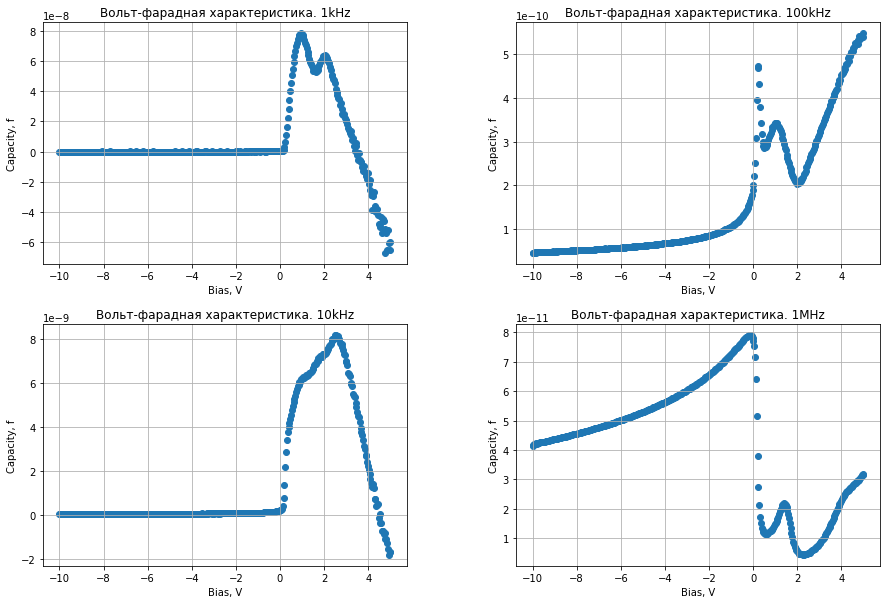

In [13]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(15,10))

axs[0, 0].scatter(x=data_agilent_1k['Bias'], y=data_agilent_1k['Capacity'])
axs[0, 0].set_title('Вольт-фарадная характеристика. 1kHz')
axs[0, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[1, 0].scatter(x=data_agilent_10k['Bias'], y=data_agilent_10k['Capacity'])
axs[1, 0].set_title('Вольт-фарадная характеристика. 10kHz')
axs[1, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[0, 1].scatter(x=data_agilent_100k['Bias'], y=data_agilent_100k['Capacity'])
axs[0, 1].set_title('Вольт-фарадная характеристика. 100kHz')
axs[0, 1].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[1, 1].scatter(x=data_agilent_1m['Bias'], y=data_agilent_1m['Capacity'])
axs[1, 1].set_title('Вольт-фарадная характеристика. 1MHz')
axs[1, 1].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

# plt.savefig('C-V_char.png')

In [196]:
data_agilent_1k_new = data_agilent_1k.loc[data_agilent_1k['Bias']<0 ]
data_agilent_10k_new = data_agilent_10k.loc[data_agilent_10k['Bias']<0 ]
data_agilent_100k_new = data_agilent_100k.loc[data_agilent_100k['Bias']<-0.1]
data_agilent_1m_new = data_agilent_1m.loc[data_agilent_1m['Bias']<-0.1 ]
data_agilent_1m_new['1_over_C2f'] = savgol_filter(data_agilent_1m_new['1_over_C2n'],5, 2, mode='interp')
data_agilent_1k['Capacity'] = savgol_filter(data_agilent_1k['Capacity'],5, 2, mode='interp')

<ipython-input-196-9742d6dd4c1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agilent_1m_new['1_over_C2f'] = savgol_filter(data_agilent_1m_new['1_over_C2n'],5, 2, mode='interp')


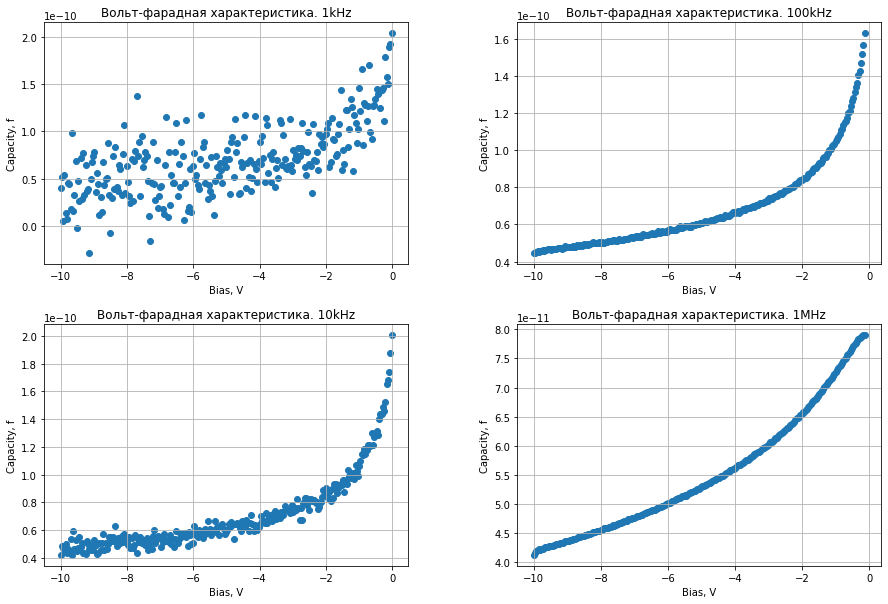

In [15]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(15,10))

axs[0, 0].scatter(x=data_agilent_1k_new['Bias'], y=data_agilent_1k_new['Capacity'])
axs[0, 0].set_title('Вольт-фарадная характеристика. 1kHz')
axs[0, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[1, 0].scatter(x=data_agilent_10k_new['Bias'], y=data_agilent_10k_new['Capacity'])
axs[1, 0].set_title('Вольт-фарадная характеристика. 10kHz')
axs[1, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[0, 1].scatter(x=data_agilent_100k_new['Bias'], y=data_agilent_100k_new['Capacity'])
axs[0, 1].set_title('Вольт-фарадная характеристика. 100kHz')
axs[0, 1].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[1, 1].scatter(x=data_agilent_1m_new['Bias'], y=data_agilent_1m_new['Capacity'])
axs[1, 1].set_title('Вольт-фарадная характеристика. 1MHz')
axs[1, 1].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

# plt.savefig('C-V_char_new.png')

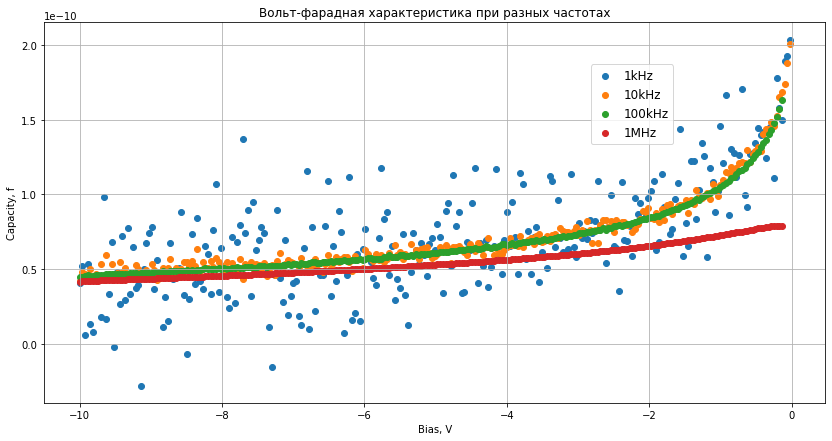

In [199]:
fig, axs = plt.subplots(figsize=(14,7))
axs = scatter(x=data_agilent_1k_new['Bias'], y=data_agilent_1k_new['Capacity'])
axs= scatter(x=data_agilent_10k_new['Bias'], y=data_agilent_10k_new['Capacity'])
axs = scatter(x=data_agilent_100k_new['Bias'], y=data_agilent_100k_new['Capacity'])
axs = scatter(x=data_agilent_1m_new['Bias'], y=data_agilent_1m_new['Capacity'])

plt.title('Вольт-фарадная характеристика при разных частотах')
plt.legend(('1kHz', '10kHz', '100kHz', '1MHz'), loc=(0.7, 0.68), handlelength=1.5, fontsize=12)
plt.xlabel('Bias, V')
plt.ylabel('Capacity, f')


plt.grid()
# plt.savefig('C-V_char_all.png')

In [201]:
data_agilent_1k_new['Capacity_f'] = savgol_filter(data_agilent_1k_new['Capacity'],9, 2, mode='interp')
data_agilent_1k_new['1_over_C2f'] = data_agilent_1k_new['Capacity_f'].apply(lambda x: 1/x**2)
data_agilent_1k_new['1_over_C2f'] = savgol_filter(data_agilent_1k_new['1_over_C2f'],5, 2, mode='interp')

<ipython-input-201-033b33f682af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agilent_1k_new['Capacity_f'] = savgol_filter(data_agilent_1k_new['Capacity'],9, 2, mode='interp')
<ipython-input-201-033b33f682af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agilent_1k_new['1_over_C2f'] = data_agilent_1k_new['Capacity_f'].apply(lambda x: 1/x**2)
<ipython-input-201-033b33f682af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

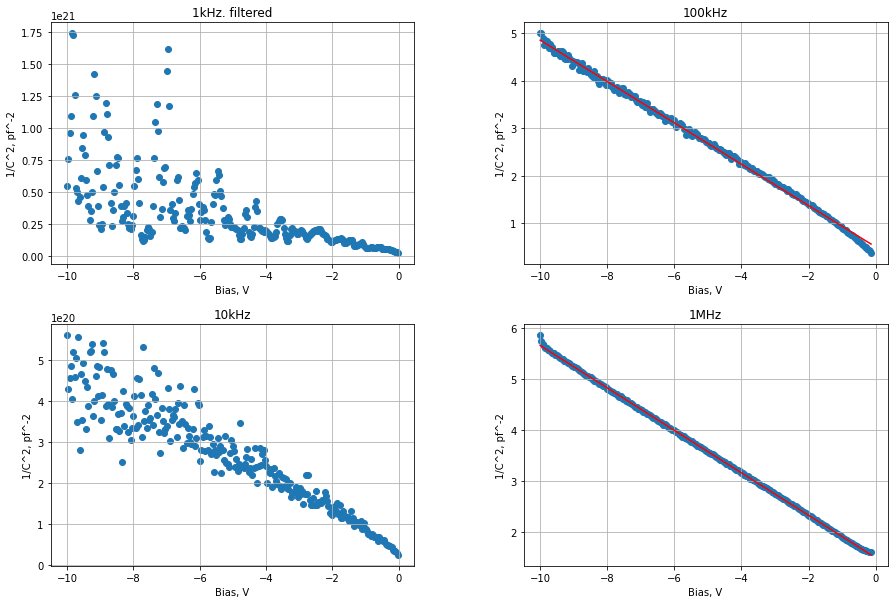

In [17]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(15,10))

axs[0, 0].scatter(x=data_agilent_1k_new['Bias'], y=data_agilent_1k_new['1_over_C2f'])
axs[0, 0].set_title('1kHz. filtered')
axs[0, 0].set(xlabel= 'Bias, V', ylabel = '1/C^2, pf^-2')

axs[1, 0].scatter(x=data_agilent_10k_new['Bias'], y=data_agilent_10k_new['1_over_C2'])
axs[1, 0].set_title('10kHz')
coefficients_10k = np.polyfit(data_agilent_10k_new['Bias'], y=data_agilent_10k_new['1_over_C2'], deg=1)
# poly_10k = np.poly1d(coefficients_10k)
# lin_fit_10k = poly_10k(data_agilent_10k_new['Bias'])
# axs[1, 0].plot(data_agilent_10k_new['Bias'], lin_fit_10k, color='red')
axs[1, 0].set(xlabel= 'Bias, V', ylabel = '1/C^2, pf^-2')

axs[0, 1].scatter(x=data_agilent_100k_new['Bias'], y=data_agilent_100k_new['1_over_C2n'])
axs[0, 1].set_title('100kHz')
coefficients_100k = np.polyfit(data_agilent_100k_new['Bias'], y=data_agilent_100k_new['1_over_C2n'], deg=1)
poly_100k = np.poly1d(coefficients_100k)
lin_fit_100k = poly_100k(data_agilent_100k_new['Bias'])
axs[0, 1].plot(data_agilent_100k_new['Bias'], lin_fit_100k, color='red')
axs[0, 1].set(xlabel= 'Bias, V', ylabel = '1/C^2, pf^-2')

axs[1, 1].scatter(x=data_agilent_1m_new['Bias'], y=data_agilent_1m_new['1_over_C2n'])
axs[1, 1].set_title('1MHz')
coefficients_1m = np.polyfit(data_agilent_1m_new['Bias'], y=data_agilent_1m_new['1_over_C2n'], deg=1)
poly_1m = np.poly1d(coefficients_1m)
lin_fit_1m = poly_1m(data_agilent_1m_new['Bias'])
axs[1, 1].plot(data_agilent_1m_new['Bias'], lin_fit_1m, color='red')
axs[1, 1].set(xlabel= 'Bias, V', ylabel = '1/C^2, pf^-2')

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

# plt.savefig('1_over_C2-V.png')

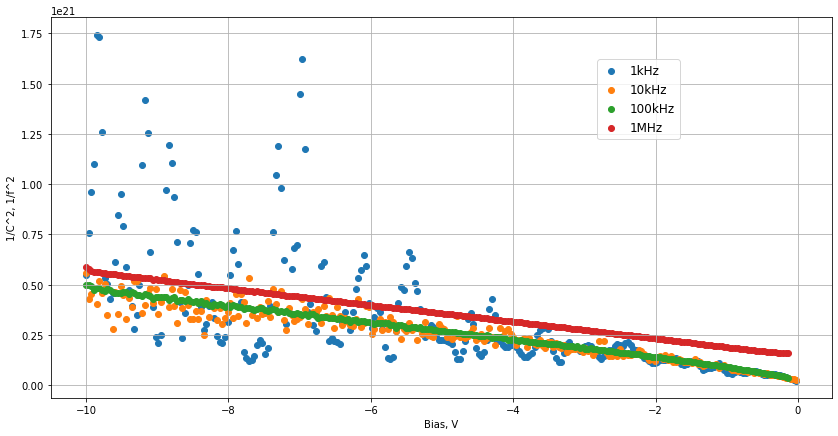

In [203]:
fig, axs = plt.subplots(figsize=(14,7))
axs = scatter(x=data_agilent_1k_new['Bias'], y=data_agilent_1k_new['1_over_C2f'])
axs= scatter(x=data_agilent_10k_new['Bias'], y=data_agilent_10k_new['1_over_C2'])
axs = scatter(x=data_agilent_100k_new['Bias'], y=data_agilent_100k_new['1_over_C2'])
axs = scatter(x=data_agilent_1m_new['Bias'], y=data_agilent_1m_new['1_over_C2'])

# plt.title('Вольт-фарадная характеристика при разных частотах')
plt.legend(('1kHz', '10kHz', '100kHz', '1MHz'), loc=(0.7, 0.68), handlelength=1.5, fontsize=12)
plt.xlabel('Bias, V')
plt.ylabel('1/C^2, 1/f^2')


plt.grid()
# plt.savefig('1_overC2_all.png')

In [18]:
MSE_100k = np.sqrt(mean_squared_error(data_agilent_100k_new['1_over_C2n'],  poly_100k(data_agilent_100k_new['Bias'])) + 0.02**2)
MSE_1m = np.sqrt(mean_squared_error(data_agilent_1m_new['1_over_C2n'],  poly_1m(data_agilent_1m_new['Bias'])) + 0.02**2)
print(MSE_100k, MSE_1m)

0.05914636552133884 0.027488073060631623


In [151]:
data_agilent_1m_new['N_d'] =  -2/(eps* constants.epsilon_0*constants.e*
                 1e17*S)/numpy.gradient(data_agilent_1m_new['1_over_C2f'],data_agilent_1m_new['Bias'])

<ipython-input-151-6df0b03111ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agilent_1m_new['N_d'] =  -2/(eps* constants.epsilon_0*constants.e*


<Figure size 720x432 with 0 Axes>

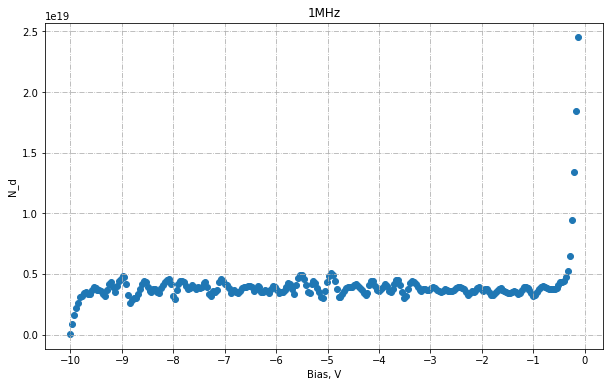

In [152]:
plt.figure(figsize(10,6))
fig1, ax = plt.subplots()
fig1 = plt.scatter(x=data_agilent_1m_new['Bias'], y=savgol_filter(data_agilent_1m_new['N_d'],9, 2, mode='interp'))

ax.grid(True, linestyle='-.')
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.title('1MHz')

plt.xlabel('Bias, V')
plt.ylabel('N_d')

# plt.savefig('N_d-V_1MHz.png')

plt.show()

In [146]:
Vd_100k = poly_100k[0]/poly_100k[1]
Vd_1m = poly_1m[0]/poly_1m[1]

alpha_100k = -np.arctan(poly_100k[1])
alpha_1m = -np.arctan(poly_1m[1])

d=1e-3
S = constants.pi*d**2 /4

Nd_100k= 2/(eps*S* constants.epsilon_0*constants.e*1e19) * 1/alpha_100k
Nd_1m= 2/(eps*S* constants.epsilon_0*constants.e*1e19) * 1/alpha_1m

In [147]:
x_d_100k = np.sqrt(-2*eps* constants.epsilon_0*
                                 (Vd_100k)/(constants.e*Nd_100k))
x_d_1m = np.sqrt(-2*eps* constants.epsilon_0*
                                 (Vd_1m)/(constants.e*Nd_1m))
print(x_d_100k, x_d_1m, x_d_1m*MSE_100k)

0.00019933100907736936 0.00034454819084602444 2.0378773235494975e-05


In [150]:
constants.epsilon_0

8.8541878128e-12

In [149]:
print('Уравнение прямой 100kHz:', poly_100k)
print("Arctan коэффициента угла наклона:", alpha_100k.round(2))
print("Диффузионное напряжение Vd =", Vd_100k.round(2),'V+-', (MSE_100k*Vd_100k).round(2),'V')
print('N_d =',(Nd_100k/1e16).round(1),'* 10^16 +-', (Nd_100k*MSE_100k/1e16).round(1),'* 10^16')
print('Уравнение прямой 1MHz:', poly_1m)
print("Arctan коэффициента угла наклона:", alpha_1m.round(2))
print("Диффузионное напряжение Vd =", Vd_1m.round(1),'V+-', (MSE_100k*Vd_1m).round(1), 'V')
print('N_d =',(Nd_1m/1e16).round(1),'* 10^16 +-', (Nd_1m*MSE_1m/1e16).round(1),'* 10^16')

Уравнение прямой 100kHz:  
-0.4357 x + 0.4999
Arctan коэффициента угла наклона: 0.41
Диффузионное напряжение Vd = -1.15 V+- -0.07 V
N_d = 3.7 * 10^16 +- 0.2 * 10^16
Уравнение прямой 1MHz:  
-0.4177 x + 1.487
Arctan коэффициента угла наклона: 0.4
Диффузионное напряжение Vd = -3.6 V+- -0.2 V
N_d = 3.9 * 10^16 +- 0.1 * 10^16


$\tau = \frac{t_2-t_1}{ln(\frac{t_2}{t_1})}$

$t_2 = 5.2*t_1$

$ln(\frac{1}{\tau T^2}) = ln(B \sigma_n) - \frac{\Delta E}{kT}$

In [153]:
t1 = [5*1e-3, 2*1e-3, 1e-3, 5*1e-4]
t = [2*1e-3, 1e-3, 5*1e-4]

In [154]:
def tau(t):
    return 4.2*t/np.log(5.2)

In [155]:
tau_t1=[]
for i in range (len(t1)):
    tau_t1.append(tau(t1[i]))
print(tau_t1)

tau_t=[]
for i in range (len(t)):
    tau_t.append(tau(t[i]))
print(tau_t)

[0.012737627835185197, 0.005095051134074079, 0.0025475255670370394, 0.0012737627835185197]
[0.005095051134074079, 0.0025475255670370394, 0.0012737627835185197]


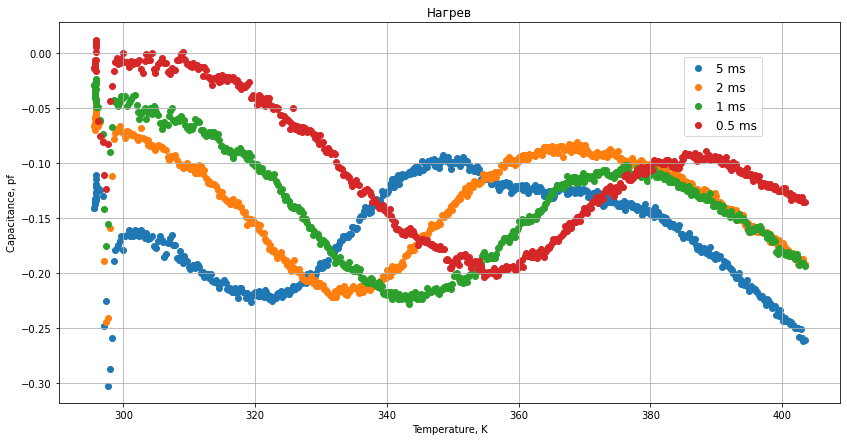

In [156]:
fig, axs = plt.subplots(figsize=(14,7))
axs = scatter(x=data_sula_h['T'],y=data_sula_h['channel_1'])
axs= scatter(x=data_sula_h['T'],y=data_sula_h['channel_2'])
axs = scatter(x=data_sula_h['T'],y=data_sula_h['channel_3'])
axs = scatter(x=data_sula_h['T'],y=data_sula_h['channel_4'])

plt.title('Нагрев')
plt.legend(('5 ms', '2 ms', '1 ms', '0.5 ms'), loc=(0.8, 0.70), handlelength=1.5, fontsize=12)
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')

plt.grid()

# plt.savefig('C-T_300-400.png')

In [157]:
min_peak1a = [data_sula_h['channel_{}'
                       .format(i)][find_peaks(-data_sula_h['channel_{}'.format(i)], width=30)[0][0]] for i in range(1, 5)]

T_peak1a = [data_sula_h.loc[(data_sula_h['channel_{}'.format(i)] == min_peak1a[i-1]) & (data_sula_h['T']<380)& (data_sula_h['T']>310)]['T'].max() for i in range(1, 5)]

print('Минимальные значения ёмкости 1 пик, пФ:','\n',min_peak1a)
print('Соответствующие значения температуры, К:','\n',T_peak1a)

Минимальные значения ёмкости 1 пик, пФ: 
 [-0.2264, -0.2222, -0.2277, -0.2036]
Соответствующие значения температуры, К: 
 [319.3, 331.7, 343.3, 354.8]


In [162]:
peak_1a = {'T_peak':T_peak1a,'Capacity_pf':min_peak1a,'tau':tau_t1}
peak_1a = pd.DataFrame(peak_1a)
peak_1a['tau_T2'] = peak_1a['tau']*peak_1a['T_peak']**2
peak_1a['1_over_T'] = constants.e/(peak_1a['T_peak']*constants.k)
peak_1a['ln'] = np.log(peak_1a['tau_T2'])

 
0.5713 x - 13.62


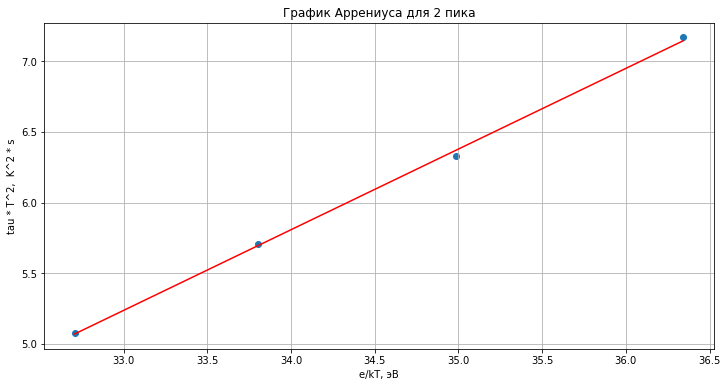

In [165]:
fig, axs = plt.subplots(figsize=(12,6))

plt.scatter(peak_1a['1_over_T'], peak_1a['ln'])

coefficients_arr1a = np.polyfit(peak_1a['1_over_T'], peak_1a['ln'], deg=1)
poly_arr1a = np.poly1d(coefficients_arr1a)
lin_fit_arr1a = poly_arr1a(peak_1a['1_over_T'])
plt.plot(peak_1a['1_over_T'], lin_fit_arr1a, color='red')

plt.title('График Аррениуса для 2 пика')
plt.xlabel('e/kT, эB')
plt.ylabel('tau * T^2,  K^2 * s')
plt.grid()
plt.savefig('arr_peak_2h.png')

print(poly_arr1a)

In [166]:
MSE_1a = np.sqrt(mean_squared_error(peak_1a['ln'], poly_arr1a(peak_1a['1_over_T'])))

In [167]:
slope_1a = poly_arr1a[1]
energy_1a =  slope_1a
sigm_1a = np.exp(-poly_arr1a[0])/3.3/1e20


In [168]:
print('Энергия активации',(energy_1a).round(2), '+-', (MSE_1a*energy_1a).round(2),'эВ')
print('Сечение захвата',(sigm_1a*1e15).round(2),'+-',(MSE_1a*sigm_1a*1e15).round(2), '*10^-15 cм^2')

Энергия активации 0.57 +- 0.01 эВ
Сечение захвата 2.48 +- 0.06 *10^-15 cм^2


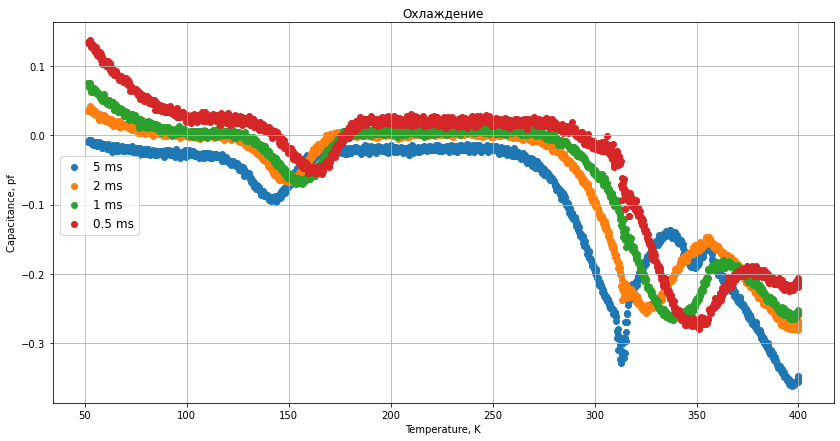

In [169]:
fig, axs = plt.subplots(figsize=(14,7))
axs = scatter(x=data_sula_c['T'],y=data_sula_c['channel_1'])
axs= scatter(x=data_sula_c['T'],y=data_sula_c['channel_2'])
axs = scatter(x=data_sula_c['T'],y=data_sula_c['channel_3'])
axs = scatter(x=data_sula_c['T'],y=data_sula_c['channel_4'])

plt.title('Охлаждение')
plt.legend(('5 ms', '2 ms', '1 ms', '0.5 ms'), loc=(0.01, 0.44), handlelength=1.5, fontsize=12)
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')

plt.grid()

# plt.savefig('C-T_400-50.png')

In [170]:
min_peak1 = [data_sula_c['channel_{}'
                       .format(i)][find_peaks(-data_sula_c['channel_{}'.format(i)], width=30)[0][0]] for i in range(1, 5)]

T_peak1 = [data_sula_c.loc[(data_sula_c['channel_{}'.format(i)] == min_peak1[i-1]) & (data_sula_c['T']<190)]['T'].max() for i in range(1, 5)]

print('Минимальные значения ёмкости 1 пик, пФ:','\n',min_peak1)
print('Соответствующие значения температуры, К:','\n',T_peak1)

Минимальные значения ёмкости 1 пик, пФ: 
 [-0.09613, -0.06775, -0.07111, -0.05615]
Соответствующие значения температуры, К: 
 [143.9, 152.5, 153.8, 166.4]


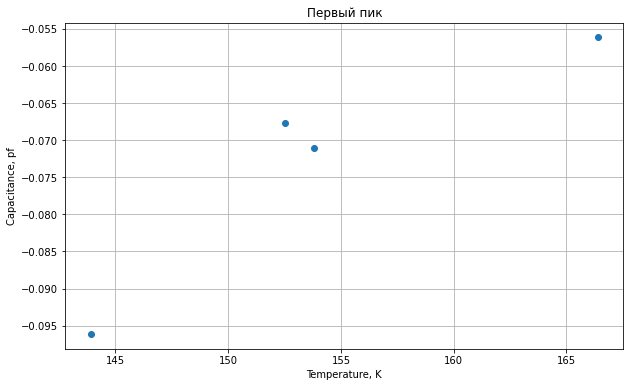

In [171]:
plt.scatter(T_peak1, min_peak1)

plt.title('Первый пик')
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')
plt.grid()

In [172]:
peak_1 = {'T_peak':T_peak1,'Capacity_pf':min_peak1,'tau':tau_t1}
peak_1 = pd.DataFrame(peak_1)
peak_1['tau_T2'] = peak_1['tau']*peak_1['T_peak']**2
peak_1['1_over_T'] = constants.e/(peak_1['T_peak']*constants.k)
peak_1['ln'] = np.log(peak_1['tau_T2'])

 
0.1852 x - 9.475


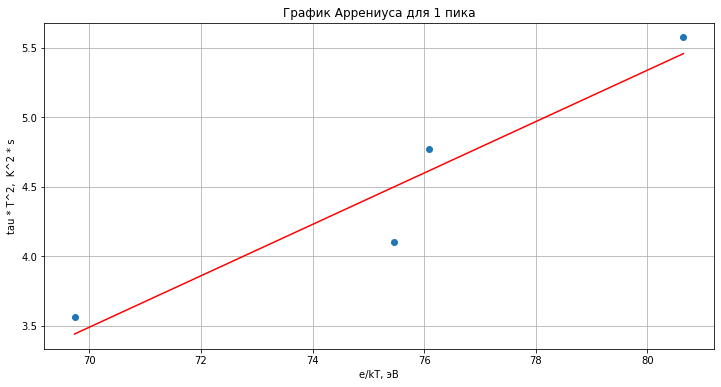

In [173]:
fig, axs = plt.subplots(figsize=(12,6))

plt.scatter(peak_1['1_over_T'], peak_1['ln'])

coefficients_arr1 = np.polyfit(peak_1['1_over_T'], peak_1['ln'], deg=1)
poly_arr1 = np.poly1d(coefficients_arr1)
lin_fit_arr1 = poly_arr1(peak_1['1_over_T'])
plt.plot(peak_1['1_over_T'], lin_fit_arr1, color='red')

plt.title('График Аррениуса для 1 пика')
plt.xlabel('e/kT, эB')
plt.ylabel('tau * T^2,  K^2 * s')
plt.grid()
# plt.savefig('arr_peak_1.png')

print(poly_arr1)

In [174]:
MSE_1 = np.sqrt(mean_squared_error(peak_1['ln'], poly_arr1(peak_1['1_over_T'])))

In [175]:
slope_1 = poly_arr1[1]
energy_1 =  slope_1
sigm_1 = np.exp(-poly_arr1[0])/3.3/1e20


In [176]:
print('Энергия активации',(energy_1).round(2), '+-', (MSE_1*energy_1).round(2),'эВ')
print('Сечение захвата',(sigm_1*1e16).round(3),'+-',(MSE_1*sigm_1*1e16).round(3), '*10^-16 cм^2')

Энергия активации 0.19 +- 0.04 эВ
Сечение захвата 0.395 +- 0.091 *10^-16 cм^2


In [177]:
poly_arr1[0]

-9.474698512748477

In [178]:
min_peak2 = [data_sula_c['channel_{}'
                       .format(i)][find_peaks(-data_sula_c['channel_{}'.format(i)], width=15, distance=45)[0][1]] for i in range(1, 5)]

T_peak2 = [data_sula_c.loc[(data_sula_c['channel_{}'.format(i)] == min_peak2[i-1]) & (data_sula_c['T']>190)]['T'].mean() for i in range(1, 5)]

print('Минимальные значения ёмкости 1 пик, пФ:','\n',min_peak2)
print('Соответствующие значения температуры, К:','\n',T_peak2)

Минимальные значения ёмкости 1 пик, пФ: 
 [-0.3278, -0.256, -0.267, -0.2798]
Соответствующие значения температуры, К: 
 [313.1, 325.3, 338.4, 351.2]


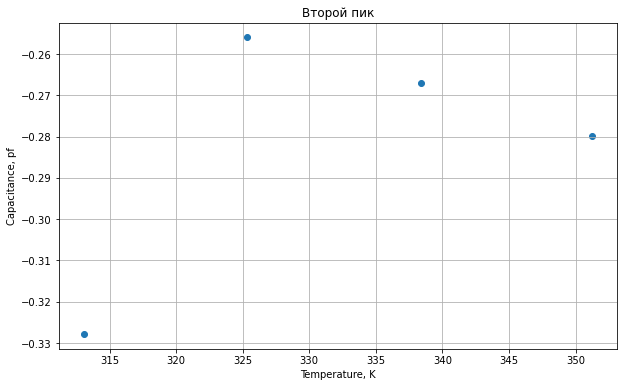

In [179]:
plt.scatter(T_peak2, min_peak2)


# coefficients_peak2 = np.polyfit(T_peak2, min_peak2, deg=1)
# poly_2 = np.poly1d(coefficients_peak2)
# lin_fit = poly_2(T_peak2)
# plt.plot(T_peak2, lin_fit, color='red')

plt.title('Второй пик')
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')
plt.grid()

In [180]:
peak_2 = {'T_peak':T_peak2,'Capacity_pf':min_peak2,'tau':tau_t1}
peak_2 = pd.DataFrame(peak_2)
peak_2['tau_T2'] = peak_2['tau']*peak_2['T_peak']**2
peak_2['1_over_T'] = constants.e/(peak_2['T_peak']*constants.k)
peak_2['ln'] = np.log(peak_2['tau_T2'])

 
0.5087 x - 11.77


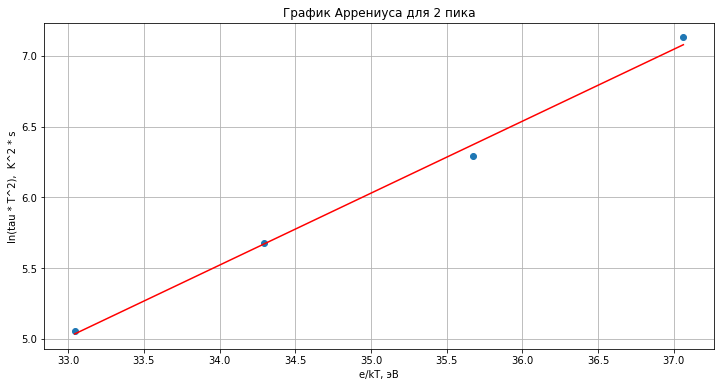

In [181]:
fig, axs = plt.subplots(figsize=(12,6))

plt.scatter(peak_2['1_over_T'], peak_2['ln'])

coefficients_arr2 = np.polyfit(peak_2['1_over_T'], peak_2['ln'], deg=1)
poly_arr2 = np.poly1d(coefficients_arr2)
lin_fit_arr2 = poly_arr2(peak_2['1_over_T'])
plt.plot(peak_2['1_over_T'], lin_fit_arr2, color='red')

plt.title('График Аррениуса для 2 пика')
plt.xlabel('e/kT, эB')
plt.ylabel('ln(tau * T^2),  K^2 * s')
plt.grid()

# plt.savefig('arr_peak_2_c.png')

print(poly_arr2)

In [182]:
MSE_2 = np.sqrt(mean_squared_error(peak_2['ln'], poly_arr2(peak_2['1_over_T'])))
print(MSE_2)

0.049689805343690094


In [183]:
slope_2 = poly_arr2[1]

sigm_2 = np.exp(-poly_arr2[0])/3.3/1e20

In [184]:
print('Энергия активации',(slope_2).round(2), '+-', (MSE_2*slope_2).round(2),'эВ')
print('Сечение захвата',(sigm_2*1e16).round(2),'+-',(MSE_2*sigm_2*1e16).round(2), '*10^-16 cм^2')

Энергия активации 0.51 +- 0.03 эВ
Сечение захвата 3.93 +- 0.2 *10^-16 cм^2


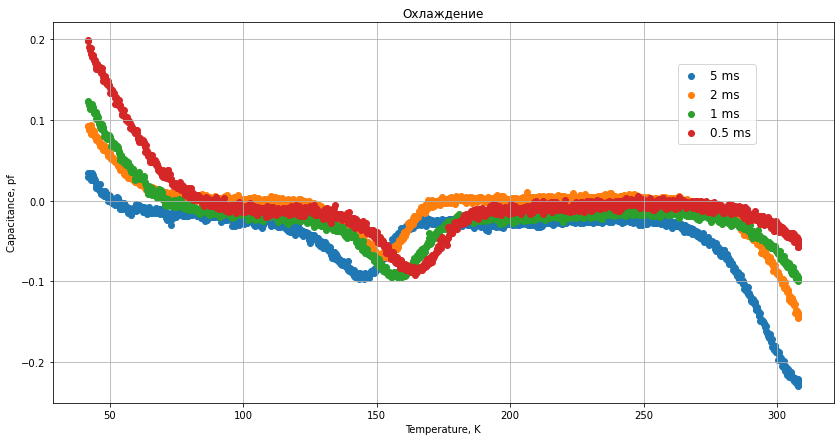

In [185]:
fig, axs = plt.subplots(figsize=(14,7))
axs = scatter(x=data_sula1['T'],y=data_sula1['channel_1'])
axs= scatter(x=data_sula1['T'],y=data_sula1['channel_2'])
axs = scatter(x=data_sula1['T'],y=data_sula1['channel_3'])
axs = scatter(x=data_sula1['T'],y=data_sula1['channel_4'])

plt.title('Охлаждение')
plt.legend(('5 ms', '2 ms', '1 ms', '0.5 ms'), loc=(0.8, 0.68), handlelength=1.5, fontsize=12)
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')

plt.grid()

# plt.savefig('C-T_320-50.png')

In [186]:
min_peak1a = [data_sula1['channel_{}'
                       .format(i)][find_peaks(-data_sula1['channel_{}'.format(i)], width=30)[0][0]] for i in range(1, 5)]

T_peak1a = [data_sula1.loc[(data_sula1['channel_{}'.format(i)] == min_peak1a[i-1]) & (data_sula1['T']<190)]['T'].max() for i in range(1, 5)]

print('Минимальные значения ёмкости 1 пик, пФ:','\n',min_peak1a)
print('Соответствующие значения температуры, К:','\n',T_peak1a)

Минимальные значения ёмкости 1 пик, пФ: 
 [-0.09735, -0.07172, -0.09491000000000001, -0.09216]
Соответствующие значения температуры, К: 
 [143.5, 150.5, 159.5, 164.4]


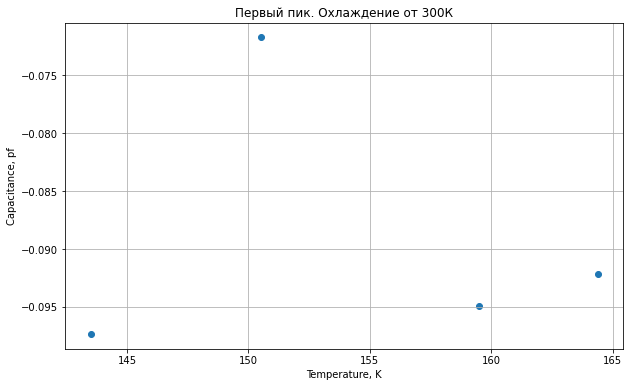

In [187]:
plt.scatter(T_peak1a, min_peak1a)


plt.title('Первый пик. Охлаждение от 300К')
plt.xlabel('Temperature, K')
plt.ylabel('Capacitance, pf')
plt.grid()

In [188]:
peak_1a = {'T_peak':T_peak1a,'Capacity_pf':min_peak1a,'tau':tau_t1}
peak_1a = pd.DataFrame(peak_1a)
peak_1a['tau_T2'] = peak_1a['tau']*peak_1a['T_peak']**2
peak_1a['1_over_T'] = constants.e/(peak_1a['T_peak']*constants.k)
peak_1a['ln'] = np.log(peak_1a['tau_T2'])

 
0.1852 x - 9.475


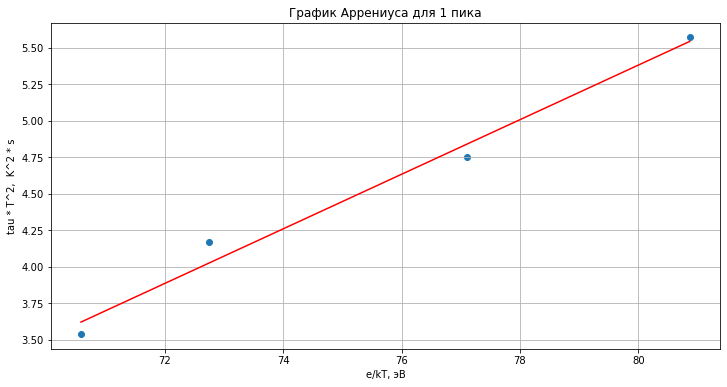

In [189]:
fig, axs = plt.subplots(figsize=(12,6))

plt.scatter(peak_1a['1_over_T'], peak_1a['ln'])

coefficients_arr1a = np.polyfit(peak_1a['1_over_T'], peak_1a['ln'], deg=1)
poly_arr1a = np.poly1d(coefficients_arr1a)
lin_fit_arr1a = poly_arr1a(peak_1a['1_over_T'])
plt.plot(peak_1a['1_over_T'], lin_fit_arr1a, color='red')

plt.title('График Аррениуса для 1 пика')
plt.xlabel('e/kT, эB')
plt.ylabel('tau * T^2,  K^2 * s')
plt.grid()
# plt.savefig('arr_peak_1a_c.png')

print(poly_arr1)

In [190]:
MSE_1a = np.sqrt(mean_squared_error(peak_1a['ln'], poly_arr1a(peak_1a['1_over_T'])))

In [191]:
slope_1a = poly_arr1a[1]

sigm_1a = np.exp(-poly_arr1a[0])/3.3/1e20

In [192]:
print('Энергия активации',(slope_1a).round(2), '+-', (MSE_1a*slope_1a).round(2),'эВ')
print('Сечение захвата',(sigm_1a*1e16).round(2),'+-',(MSE_1a*sigm_1a*1e16).round(2), '*10^-16 cм^2')

Энергия активации 0.19 +- 0.02 эВ
Сечение захвата 0.44 +- 0.04 *10^-16 cм^2
